### [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- Non-parametric technique for classification & regression
- Simple to understand, interpret & visualize using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree). 
- Export results to [Graphviz](https://www.graphviz.org/) format using [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). Import via `conda install python-graphviz`.
- Requires little data prep.
- Computational cost is logarithmic, ie log(#datapoints).
- Can handle numerical & categorical data (note: Scikit-Learn implementation does not support categories at this time.)
- Multi-output problem support.
- Can be validated with statistical tests.
- Prone to overfitting with overly complex trees. Pruning, fixing maximum leaf sizes and fixing maximum tree depths help.
- Prone to instability due to data variations causing completely different trees to be built. Ensembles help.
- Cannot guarantee globally optimal solutions due to algorithms choosing locally optimal answers at each node. Ensembles help.
- Some concepts, such as XOR, do not lend themselves well to tree techniques.
- Prone to bias in unbalanced dataset problems. Prebalancing datasets prior to fitting will help.

### [DT Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- Capable of multiclass classifications.
- Accepts array X (#samples, #features) (dense or sparse) of training samples, and array Y (#samples) of class labels for training.

[1]
[[0. 1. 0.]]


[Text(0.4, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

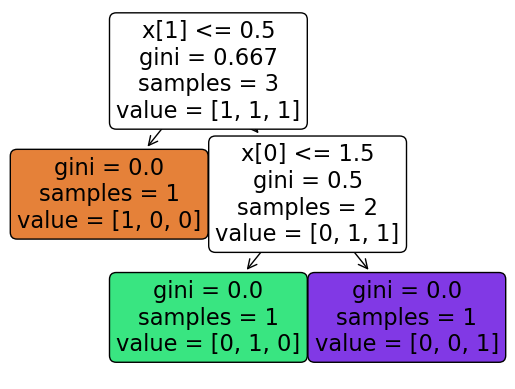

In [1]:
from sklearn import tree

X,y = [[0,0],[1,1],[2,2]], [0,1,2]
clf = tree.DecisionTreeClassifier(); clf.fit(X,y)

print(clf.predict([[0.6,2.0]]))
print(clf.predict_proba([[0.6,2.0]]))
tree.plot_tree(clf, rounded=True, filled=True)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

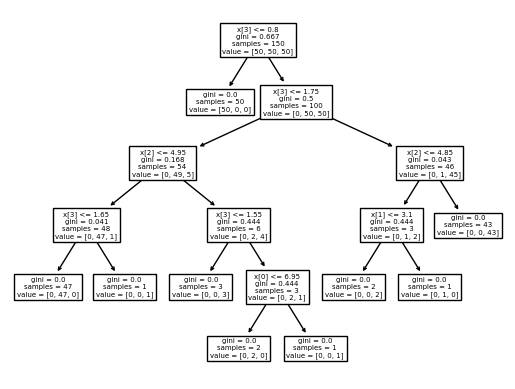

In [2]:
# example classification - Iris dataset
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

### Graphviz inline rendering
- results saved to `iris.pdf`

In [5]:
import graphviz
data = tree.export_graphviz(clf, 
                            out_file=None,
                            special_characters=True)
graph = graphviz.Source(data)
graph.render("iris")

'iris.pdf'

In [6]:
# Exporting to text format
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_text

iris = load_iris()
dt = DTC(random_state=0, max_depth=3)
dt = dt.fit(iris.data, iris.target)
r = export_text(dt, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### [Example: Plot DT decision surface - iris dataset](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
n_classes, plot_colors, plot_step = 3, "ryb", 0.02
iris = load_iris()

/tmp/ipykernel_106981/1848311782.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_106981/1848311782.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_106981/1848311782.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_106981/1848311782.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_106981/1848311782.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_106981/1848311782.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


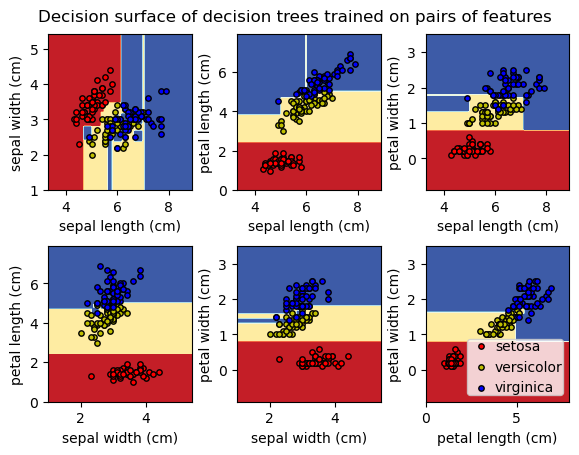

In [14]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    clf = DTC().fit(X, y)

# Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

### [DT Regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- Same principles as DT Classification, except y (labels) are expected to be floating point values.

### [example: fit sine curve with decision tree](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)
- observation: if `max_depth` is too high, the decision tree can overfit & learn from noise.

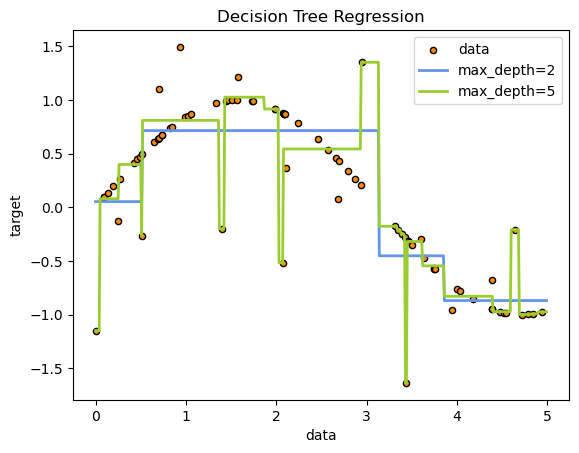

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR

# dataset = noisy sine wave
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DTR(max_depth=2); regr_1.fit(X, y)
regr_2 = DTR(max_depth=5); regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Multiple-output Decision Trees
- Supervised learning problem with multiple outputs to predict
- Y is a 2D array of (#samples, #outputs)
- If no correlation between the outputs, the simplest solution is to build $n$ independent models - one per output.
- If correlation is suspected, it's often better to build a single, multi-output-capable model by storing $n$ output values in leaves (instead of one), and by using an *average reduction* criteria for splitting.
- [DTC](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) both support multiple outputs.
- Outputs:
    - `predict`: a list of n output values
    - `predict_proba`: a list of n arrays of class probabilities

### [example: multi-output regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html)
- Dataset is a circle with one underlying feature
- Note how overfit occurs if `max_depth` is set too high.

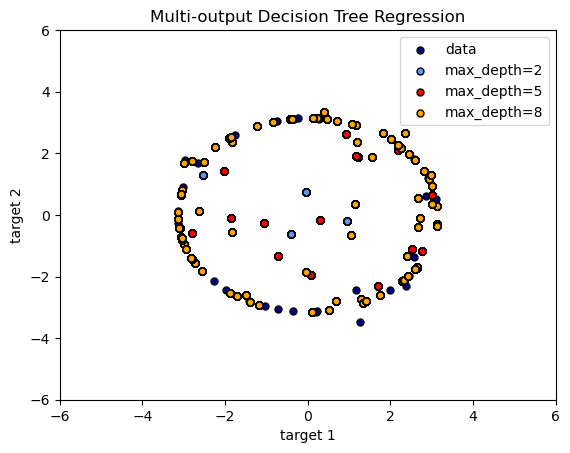

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR

# dataset = noisy sine wave
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

# Fit regression model
regr_1 = DTR(max_depth=2); regr_1.fit(X, y)
regr_2 = DTR(max_depth=5); regr_2.fit(X, y)
regr_3 = DTR(max_depth=8); regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 25
plt.scatter(  y[:, 0],   y[:, 1], c="navy",           s=s, edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red",            s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange",         s=s, edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

### [example: multi-output estimator comparison using face image completion](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html)
- goal: predict lower half of each facial image, given its upper half.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

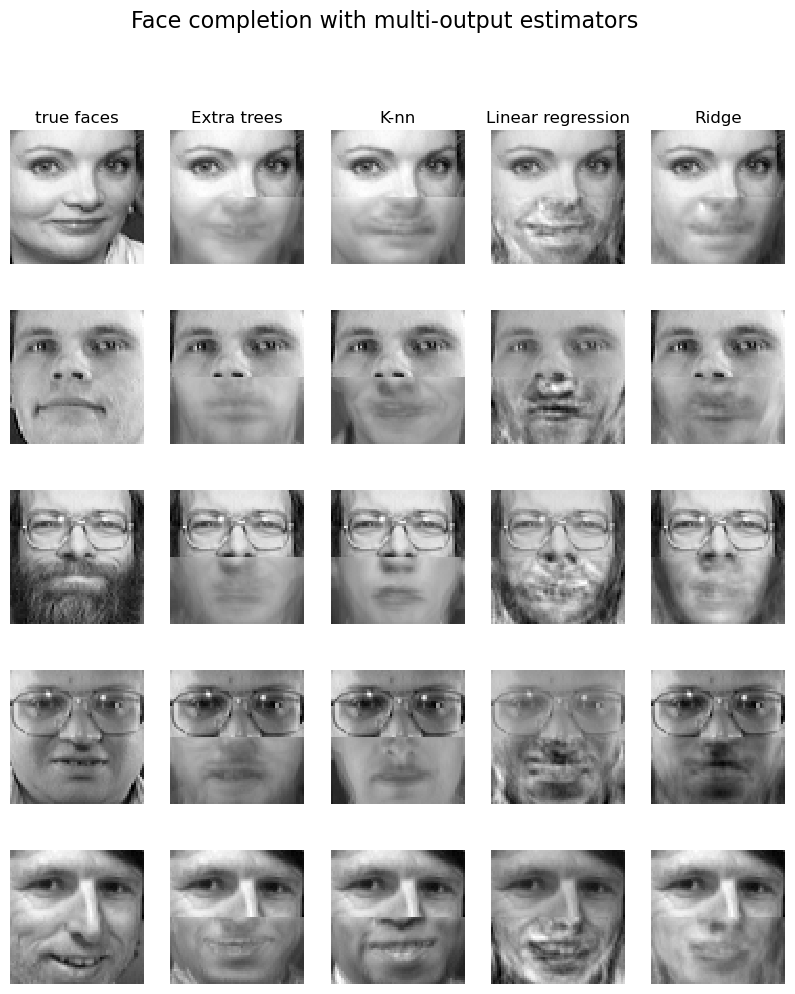

In [19]:
# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]

X_train = train[:, :(n_pixels+1) // 2] #upper half of faces
y_train = train[:,   n_pixels    // 2:] # Lower half of the faces

X_test = test[  :, :(n_pixels+1) // 2]
y_test = test[  :,   n_pixels    // 2:]# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

### Complexity
- Binary tree build time: $O(n_{samples}n_{features}\log(n_{samples}))$
- Binary tree query time: $O(\log(n_{samples}))$
- Trees will not always be balanced. assuming balanced subtrees, the cost of searching each node for the largest reduction of entropy is $O(n_{features}n_{samples}\log(n_{samples}))$ per node.

### Tips

- __DTs can overfit__ on data with a large #features. Getting the right ratio of samples to number of features is important - trees with few samples in a high-D space is very likely to overfit.

- Consider performing __dimensionality reduction__ (PCA, ICA, or Feature selection) to give your tree a better chance of finding important features.

- __Visualize__ your tree during training with the __export__ function. Use `max_depth=3` as an initial tree depth to get a feel for how the tree is fitting.

- The #samples required to populate the tree __doubles for each additional level__ the tree grows to. Use `max_depth` to control the size of the tree to prevent overfitting.

- Use `min_samples_split` or `min_samples_leaf` to ensure that multiple samples inform every decision in the tree. They control which splits will be considered. A small number usually means the tree will overfit; a large number prevents the tree from learning the data.

- Try `min_samples_leaf=5` as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters.

- While `min_samples_split` can create arbitrarily small leaves, `min_samples_leaf` guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, `min_samples_leaf=1` is often the best choice.

- `min_samples_split` considers samples directly and is __independent of sample_weight__, if provided (e.g. a node with m weighted samples is still treated as having exactly m samples). Consider `min_weight_fraction_leaf` or `min_impurity_decrease` if accounting for sample weights is required at splits.

- __Balance your dataset__ before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

- __Weighted samples__: it's easier to optimize the tree with weight-based pre-pruning criteria such as `min_weight_fraction_leaf`. This ensures leaf nodes contain at least a fraction of the overall sum of the sample weights.

- All decision trees use __np.float32 arrays__ internally. If training data is not in this format, a copy of the dataset will be made.

- __If the input matrix X is very sparse__, consider converting it to __sparse csc_matrix__ before calling fit and __sparse csr_matrix__ before calling predict. Training time can be orders of magnitude faster for a sparse matrix inputs when features have zero values in most of the samples.

### DT Algorithms
- [ID3](https://en.wikipedia.org/wiki/ID3_algorithm) creates a multiway tree & finds the categorical feature that yields a maximum categorical information gain for each node. Trees are grown to a maximum size, then pruned to improve the tree's ability to generalize on unknown data.

- **C4.5** succeeded ID3 and removed the categorical variable restriction. It converts trained trees into sets of if-then rules, which are evaluated to determine an application order. Pruning is done by removing a rule's precondition if accuracy improves without it.

- **C5.0** succeeeds C4.5. It is available under a proprietary license.

- __[CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29)__ is similar to C4.5 & supports numerical (regression) targets. It builds binary trees using the feature & threshold that yields the largest information gain at each node. Scikit-Learn uses an optimized version of CART.

### Missing Values
- DT classifiers & regressors have built-in missing value support.
- for classification: when `splitter='best'` and criterion is `gini`,`entropy` or `log_loss`.
- for regression: when `splitter='best'` and criterion is `squared_error`,`friedman_mse` or `poisson`.

In [23]:
# default: samples with missing vals = classified with class used in split found during training.
from sklearn.tree import DecisionTreeClassifier as DTC
import numpy as np
X    = np.array([0, 1, 6, np.nan]).reshape(-1, 1); print(X)
y    = [0, 0, 1, 1]
tree = DTC(random_state=0).fit(X,y); tree.predict(X)

[[ 0.]
 [ 1.]
 [ 6.]
 [nan]]


array([0, 0, 1, 1])

In [24]:
# if criteria eval is same for both nodes, then tie is broken in favor of the right node.
X      = np.array([np.nan, -1, np.nan, 1]).reshape(-1, 1); print(X)
y      = [0, 0, 1, 1]
tree   = DTC(random_state=0).fit(X, y)
X_test = np.array([np.nan]).reshape(-1, 1); tree.predict(X_test)

[[nan]
 [-1.]
 [nan]
 [ 1.]]


array([1])

In [25]:
# if no missing vals during training, missing vals during prediction = mapped to child with most samples.
X      = np.array([0, 1, 2, 3]).reshape(-1, 1); print(X)
y      = [0, 1, 1, 1]
tree   = DTC(random_state=0).fit(X, y)
X_test = np.array([np.nan]).reshape(-1, 1); tree.predict(X_test)

[[0]
 [1]
 [2]
 [3]]


array([1])

### Minimal cost-complexity Pruning
- Used to prune trees to avoid overfitting.
- Controlled with parameter $\alpha>=0$ (complexity), which defines a cost-complexity measure of a tree $T$: $R_\alpha(T) = R(T) + \alpha|\widetilde{T}|$
- $|\widetilde{T}|$ is the number of terminal nodes in $T$.
- $R(T)$ is the total misclassification rate of the terminal nodes.
- Non-terminal nodes with the smallest *effective alpha* value are pruned.
- The process stops when the tree's minimal effective alpha is greater than `ccp_alpha`.

### [example: Minimal cost-complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)
- Recursively finds the "weakest link" node (as measured with an effective alpha.)
- Nodes with smallest effective alpha are pruned first.
- Use [cost_complexity_pruning_path](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to find the effective alphas & corresponding leaf impurities at each step of the pruning process.
- As alpha increases, more of the tree is pruned - which increases total impurity.

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC

In [27]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = TTS(X, y, random_state=0)

clf                    = DTC(random_state=0)
path                   = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

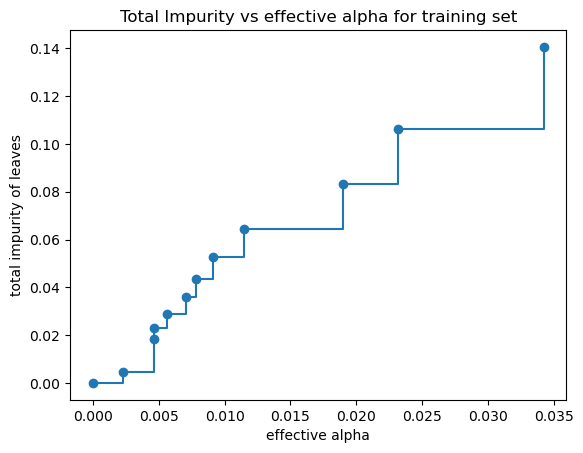

In [28]:
# max effective alpha is removed - it represents a single node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

- Train a DT using the effective alphas. 
- The last value in `ccp_alphas` will prune the entire tree - leaving it (`clfs[-1]`) with a single node.

In [29]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DTC(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("#nodes in the last tree: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, 
        ccp_alphas[-1]))

#nodes in the last tree: 1 with ccp_alpha: 0.3272984419327777


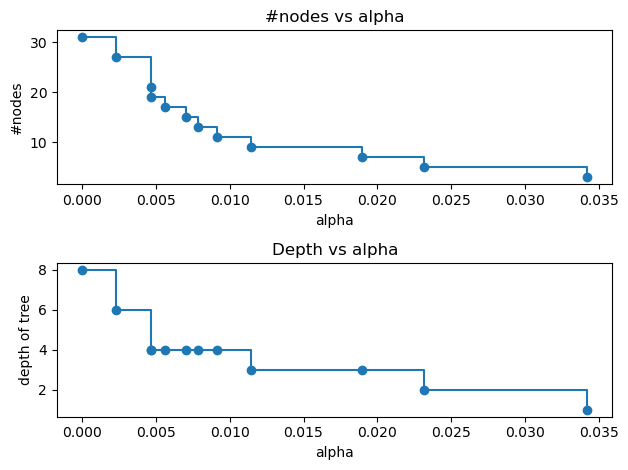

In [30]:
# show the number of nodes and tree depth as alpha increases
clfs        = clfs[:-1]
ccp_alphas  = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth       = [clf.tree_.max_depth for clf in clfs]
fig, ax     = plt.subplots(2, 1)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("#nodes")
ax[0].set_title("#nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training & testing datasets
- When using the DT Classifier with `ccp_alpha=0` and all other parameters set to their defaults, the tree will overfit.
- As alpha increaes & the tree is pruned, the tree will become better at generalization. `ccp_alpha=0.015` should provide a max testing accuracy.

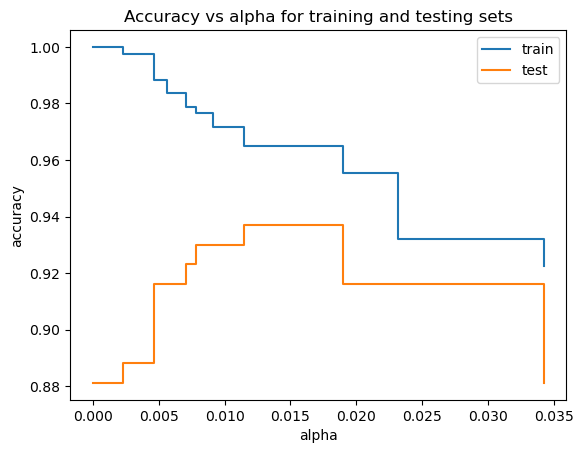

In [31]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test,  y_test)  for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha"); ax.set_ylabel("accuracy")

ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores,  label="test",  drawstyle="steps-post")

ax.legend(); plt.show()